**IMPORTING THE DATASETS**

In [33]:
import pandas as pd
df2=pd.read_csv(r"C:\Users\anton\OneDrive\Desktop\motorq\triggers_soc.csv")
df=pd.read_csv(r"C:\Users\anton\OneDrive\Desktop\motorq\telemetry_data.csv")



In [34]:
df.head()


,Unnamed: 0,VEHICLE_ID,TIMESTAMP,SPEED,IGNITION_STATUS,EV_BATTERY_LEVEL,ODOMETER
0,0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:45:42.018,NaN,NaN,NaN,NaN
1,1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:58:08.017,NaN,NaN,NaN,NaN
2,2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:57:02.031,NaN,NaN,NaN,38685.9
3,3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:38:57.002,0.0,on,NaN,NaN
4,4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 02:00:05.004,NaN,NaN,NaN,NaN


**converting time stamps**

In [35]:
df['datetime'] = pd.to_datetime(df['TIMESTAMP'])


df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time


df.drop(columns=['datetime'], inplace=True)
df.head()


,Unnamed: 0,VEHICLE_ID,TIMESTAMP,SPEED,IGNITION_STATUS,EV_BATTERY_LEVEL,ODOMETER,date,time
0,0,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:45:42.018,NaN,NaN,NaN,NaN,2021-09-23,01:45:42.018000
1,1,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:58:08.017,NaN,NaN,NaN,NaN,2021-09-23,01:58:08.017000
2,2,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:57:02.031,NaN,NaN,NaN,38685.9,2021-09-23,01:57:02.031000
3,3,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 01:38:57.002,0.0,on,NaN,NaN,2021-09-23,01:38:57.002000
4,4,66bd55df-eaf0-49c8-b9e1-7759b85e9325,2021-09-23 02:00:05.004,NaN,NaN,NaN,NaN,2021-09-23,02:00:05.004000


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823552 entries, 0 to 1823551
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   VEHICLE_ID        object 
 2   TIMESTAMP         object 
 3   SPEED             float64
 4   IGNITION_STATUS   object 
 5   EV_BATTERY_LEVEL  float64
 6   ODOMETER          float64
 7   date              object 
 8   time              object 
dtypes: float64(3), int64(1), object(5)
memory usage: 125.2+ MB


In [37]:
df.isna().sum()

Unnamed: 0                0
VEHICLE_ID                0
TIMESTAMP                 0
SPEED               1473737
IGNITION_STATUS     1596536
EV_BATTERY_LEVEL    1436376
ODOMETER            1342213
date                      0
time                      0
dtype: int64

In [38]:
df.dropna(subset=['date','time'])
df.sort_values(by='TIMESTAMP',inplace=True)
df['SPEED'] = pd.to_numeric(df['SPEED'])

In [39]:
!pip install seaborn

In [40]:

import matplotlib.pyplot as plt
import seaborn as sns


# DATA PREPROCESSING
WE STARTED DATA PREPROCESSING BY REMOVING ROWS WHICH HAVE EV CHARGE PERCENTAGE MORE THAN 100


removing rows in battery column which has battery percentage more than 100

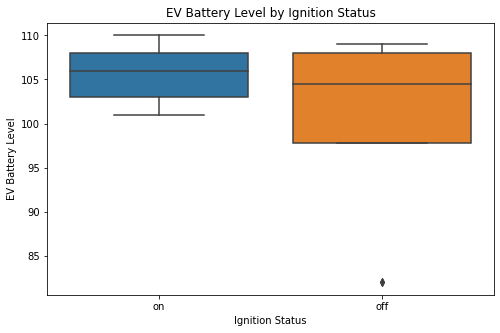

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='IGNITION_STATUS', y='EV_BATTERY_LEVEL')
plt.title('EV Battery Level by Ignition Status')
plt.xlabel('Ignition Status')
plt.ylabel('EV Battery Level')
plt.show()

In [42]:
df.isna().sum()



Unnamed: 0                0
VEHICLE_ID                0
TIMESTAMP                 0
SPEED               1473737
IGNITION_STATUS     1596536
EV_BATTERY_LEVEL    1436376
ODOMETER            1342213
date                      0
time                      0
dtype: int64

In [43]:
import numpy as np

In [44]:
df['EV_BATTERY_LEVEL'].fillna(0, inplace=True)
df = df[df['EV_BATTERY_LEVEL'] <= 100]
df['EV_BATTERY_LEVEL'].replace(0, np.nan, inplace=True)

# REMOVING ROWS WHICH HAS NULL VALUES IN ALL SPEED, IGNITION STATUS, EV BATTERY LEVEL,ODOMETER:


In [45]:
columns_to_check = ['SPEED', 'IGNITION_STATUS', 'EV_BATTERY_LEVEL', 'ODOMETER']
df = df.dropna(subset=columns_to_check, how='all')


In [46]:
df.isna().sum()

Unnamed: 0               0
VEHICLE_ID               0
TIMESTAMP                0
SPEED               668738
IGNITION_STATUS     791479
EV_BATTERY_LEVEL    632476
ODOMETER            537276
date                     0
time                     0
dtype: int64

In [47]:
df.head()

,Unnamed: 0,VEHICLE_ID,TIMESTAMP,SPEED,IGNITION_STATUS,EV_BATTERY_LEVEL,ODOMETER,date,time
698740,698740,ae912623-e122-4bfb-b2a1-7d407ea42b1b,2021-09-01 00:00:02.569,13.0,NaN,NaN,30207.4,2021-09-01,00:00:02.569000
699484,699484,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,2021-09-01 00:00:09.037,NaN,NaN,NaN,35817.8,2021-09-01,00:00:09.037000
698756,698756,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,2021-09-01 00:00:23.002,20.5,on,NaN,NaN,2021-09-01,00:00:23.002000
699302,699302,fc86bd41-dd55-4d15-bb3f-35e31c7759e6,2021-09-01 00:00:24.004,NaN,NaN,NaN,35817.8,2021-09-01,00:00:24.004000
698741,698741,39424065-b3be-45e5-8f7d-b7f16a6c190a,2021-09-01 00:00:25.748,NaN,NaN,NaN,47867.5,2021-09-01,00:00:25.748000


## QUESTION 1a)

In [48]:
ignition_events = []

# Iterate through telemetry data to detect ignition events
previous_state = None
for index, row in df.iterrows():
    current_state = row['TIMESTAMP']  # Replace with the correct column name

    if previous_state is not None and current_state != previous_state:
        event = 'ignitionOff' if current_state == 'Off' else 'ignitionOn'
        ignition_events.append({'timestamp': row['TIMESTAMP'], 'event': event})

    previous_state = current_state

# Create a DataFrame from the list of ignition events
ignition_events_df = pd.DataFrame(ignition_events)

# Display the resulting ignition events table
ignition_events_df





,timestamp,event
0,2021-09-01 00:00:09.037,ignitionOn
1,2021-09-01 00:00:23.002,ignitionOn
2,2021-09-01 00:00:24.004,ignitionOn
3,2021-09-01 00:00:25.748,ignitionOn
4,2021-09-01 00:00:54.011,ignitionOn
...,...,...
1010224,2023-01-30 23:59:44.017000,ignitionOn
1010225,2023-01-30 23:59:48.019000,ignitionOn
1010226,2023-01-30 23:59:55.011000,ignitionOn
1010227,2023-01-30 23:59:55.013000,ignitionOn


# QUESTION 1b)

In [49]:
df2.head()

,Unnamed: 0,CTS,PNID,NAME,VAL
0,0,2021-12-01 17:58:27 IST+0530,206958332,IGN_CYL,OFF
1,1,2021-12-01 17:58:27 IST+0530,206958332,IGN_CYL,OFF
2,2,2021-12-01 17:56:24 IST+0530,206958332,IGN_CYL,ON
3,3,2021-12-01 17:56:24 IST+0530,206958332,CHARGE_STATE,50.1
4,4,2021-12-01 17:56:24 IST+0530,206958332,IGN_CYL,ON


In [50]:
ignition_events = df2[df2['NAME'] == 'IGN_CYL']
ignition_events = ignition_events[ignition_events['VAL'].isin(['ON', 'OFF'])]

# Create a dictionary to map "val" values to "event" names
val_to_event = {'on': 'ignition on', 'off': 'ignition off'}

# Create the "event" column using the dictionary mapping
ignition_events['event'] = ignition_events['VAL'].map(val_to_event)

# Display the filtered and enriched ignition events
ignition_events[['VAL', 'event']]

,VAL,event
0,OFF,NaN
1,OFF,NaN
2,ON,NaN
4,ON,NaN
6,ON,NaN
...,...,...
68662,OFF,NaN
68664,OFF,NaN
68665,OFF,NaN
68666,ON,NaN


# QUESTION 1C)

In [51]:
ignition_events = df2[df2['NAME'] == 'IGN_CYL']
ignition_events = ignition_events[ignition_events['VAL'].isin(['ON', 'OFF'])]
import json
# Load the artificial ignition off data from JSON
with open(r'C:/Users/anton/Downloads/Motorq Data Science Assignment/artificial_ign_off_data.json', 'r') as json_file:

    artificial_ign_off_data = json.load(json_file)

# Create DataFrame rows for ignitionOff events from JSON data
ignition_off_rows = []
for item in artificial_ign_off_data:
    timestamp = pd.to_datetime(item['timestamp'])
    event = 'ignitionOff'
    ignition_off_rows.append({'CTS': timestamp, 'Pnid': '', 'Name': event, 'val': event})

# Create a DataFrame for the generated ignitionOff events
ignition_off_df = pd.DataFrame(ignition_off_rows)

# Concatenate the generated ignitionOff events with the existing ignition events
all_ignition_events = pd.concat([ignition_events, ignition_off_df])

# Display the generated ignitionOff events
all_ignition_events[['CTS', 'Name']]

,CTS,Name
0,2021-12-01 17:58:27 IST+0530,NaN
1,2021-12-01 17:58:27 IST+0530,NaN
2,2021-12-01 17:56:24 IST+0530,NaN
4,2021-12-01 17:56:24 IST+0530,NaN
6,2021-12-01 19:26:58 IST+0530,NaN
...,...,...
406,2021-12-19 07:32:14.004000+00:00,ignitionOff
407,2021-12-19 05:54:05.037000+00:00,ignitionOff
408,2021-12-19 04:10:51.041000+00:00,ignitionOff
409,2021-12-18 22:45:17.030000+00:00,ignitionOff


In [52]:
import json

#   QUESTION 2A)

In [53]:
ev_charge_state_events = df2[df2['NAME'] == 'EV_CHARGE_STATE']
ev_charge_state_events = ev_charge_state_events[ev_charge_state_events['VAL'].isin(['Active', 'Abort', 'Completed'])]

# Display the filtered EV charge state events
ev_charge_state_events[['CTS', 'PNID', 'VAL']]

,CTS,PNID,VAL
8,2021-12-01 19:57:32 IST+0530,256782425,Active
93,2021-12-06 22:05:51 IST+0530,258703729,Active
112,2021-12-07 01:51:38 IST+0530,256782425,Active
126,2021-12-05 03:05:12 IST+0530,265888189,Active
184,2021-12-04 04:53:01 IST+0530,258703729,Active
...,...,...,...
68507,2022-01-28 21:46:24 IST+0530,266214265,Active
68508,2022-01-28 21:46:28 IST+0530,266214265,Active
68509,2022-01-28 21:46:28 IST+0530,266214265,Active
68574,2022-01-28 20:08:30 IST+0530,256782425,Active


# QUESTION 3)

In [54]:
ignition_events = df2[df2['NAME'] == 'IGN_CYL']
ignition_events = ignition_events[ignition_events['VAL'].isin(['ON', 'OFF'])]
ignition_events['event'] = ignition_events['VAL'].apply(lambda x: 'ignitionOn' if x == 'ON' else 'ignitionOff')

# Filter triggers for EV_CHARGE_STATE events (Active, Abort, Completed)
ev_charge_state_events = df2[df2['NAME'] == 'EV_CHARGE_STATE']
ev_charge_state_events = ev_charge_state_events[ev_charge_state_events['VAL'].isin(['Active', 'Abort', 'Completed'])]
ev_charge_state_events['event'] = ev_charge_state_events['VAL']

# Create a table combining ignition events and EV trigger events
combined_events = pd.concat([ignition_events, ev_charge_state_events], sort=False)
combined_events = combined_events[['CTS', 'PNID', 'event']]
combined_events.rename(columns={'CTS': 'event_timestamp', 'Pnid': 'vehicle_id'}, inplace=True)

# Display the combined events table
combined_events

,event_timestamp,PNID,event
0,2021-12-01 17:58:27 IST+0530,206958332,ignitionOff
1,2021-12-01 17:58:27 IST+0530,206958332,ignitionOff
2,2021-12-01 17:56:24 IST+0530,206958332,ignitionOn
4,2021-12-01 17:56:24 IST+0530,206958332,ignitionOn
6,2021-12-01 19:26:58 IST+0530,256832791,ignitionOn
...,...,...,...
68507,2022-01-28 21:46:24 IST+0530,266214265,Active
68508,2022-01-28 21:46:28 IST+0530,266214265,Active
68509,2022-01-28 21:46:28 IST+0530,266214265,Active
68574,2022-01-28 20:08:30 IST+0530,256782425,Active


# Question 4a)

In [58]:
ignition_events = df2[df2['NAME'] == 'IGN_CYL']
charge_events = df2[df2['NAME'] == 'CHARGE_STATE']

# Merge ignition and charge events with telemetry data to get EV battery levels
ignition_events = pd.merge(ignition_events, df, left_on='CTS', right_on='TIMESTAMP', how='inner')
charge_events = pd.merge(charge_events, df, left_on='CTS', right_on='TIMESTAMP', how='inner')

# Select relevant columns
ignition_events = ignition_events[['CTS', 'PNID', 'VAL', 'EV_BATTERY_LEVEL']]
charge_events = charge_events[['CTS', 'PNID', 'VAL', 'EV_BATTERY_LEVEL']]

# Rename columns for clarity
ignition_events.columns = ['TIMESTAMP', 'PNID', 'event', 'EV_BATTERY_LEVEL']
charge_events.columns = ['TIMESTAMP', 'PNID', 'event', 'EV_BATTERY_LEVEL']

# Concatenate ignition and charge events
final_dataset = pd.concat([ignition_events, charge_events])

# Display the final dataset
final_dataset

,TIMESTAMP,PNID,event,EV_BATTERY_LEVEL
